In [59]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from pandas.plotting import scatter_matrix

from six.moves import urllib

%matplotlib inline
pd.set_option('display.max_columns',21)

In [60]:
! pip install -q kaggle

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! kaggle datasets list

Saving kaggle.json to kaggle (1).json
User uploaded file "kaggle.json" with length 72 bytes
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           4860        166  1.0              
surajjha101/stores-area-and-sales-data                                Supermarket store branches sales analysis            10KB  2022-04-29 11:10:16           4569        141  1.0              
devansodariya/student-performance-data                                St

In [61]:
! kaggle datasets download -d 'iabhishekofficial/mobile-price-classification'
! unzip mobile-price-classification.zip -d /content/mobile-price-classification

mobile-price-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  mobile-price-classification.zip
replace /content/mobile-price-classification/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/mobile-price-classification/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/mobile-price-classification/train.csv  


In [62]:
path = "/content/mobile-price-classification"
def load_data(books_path=path):    
    csv_path = os.path.join(books_path, "train.csv")   
    return pd.read_csv(csv_path, error_bad_lines=False)

mobile_data = load_data()
mobile_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

In [63]:
print(f'Total shape {mobile_data.shape}')
print(f'All columns: {", ".join(mobile_data.columns.values)}')

Total shape (2000, 21)
All columns: battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range


In [64]:
mobile_data.describe(include="all")

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   645.108000  1251.515500  2124.213000    12.306500   
std       6.064315   443.780811   432.199447  1084.732044     4.213245   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

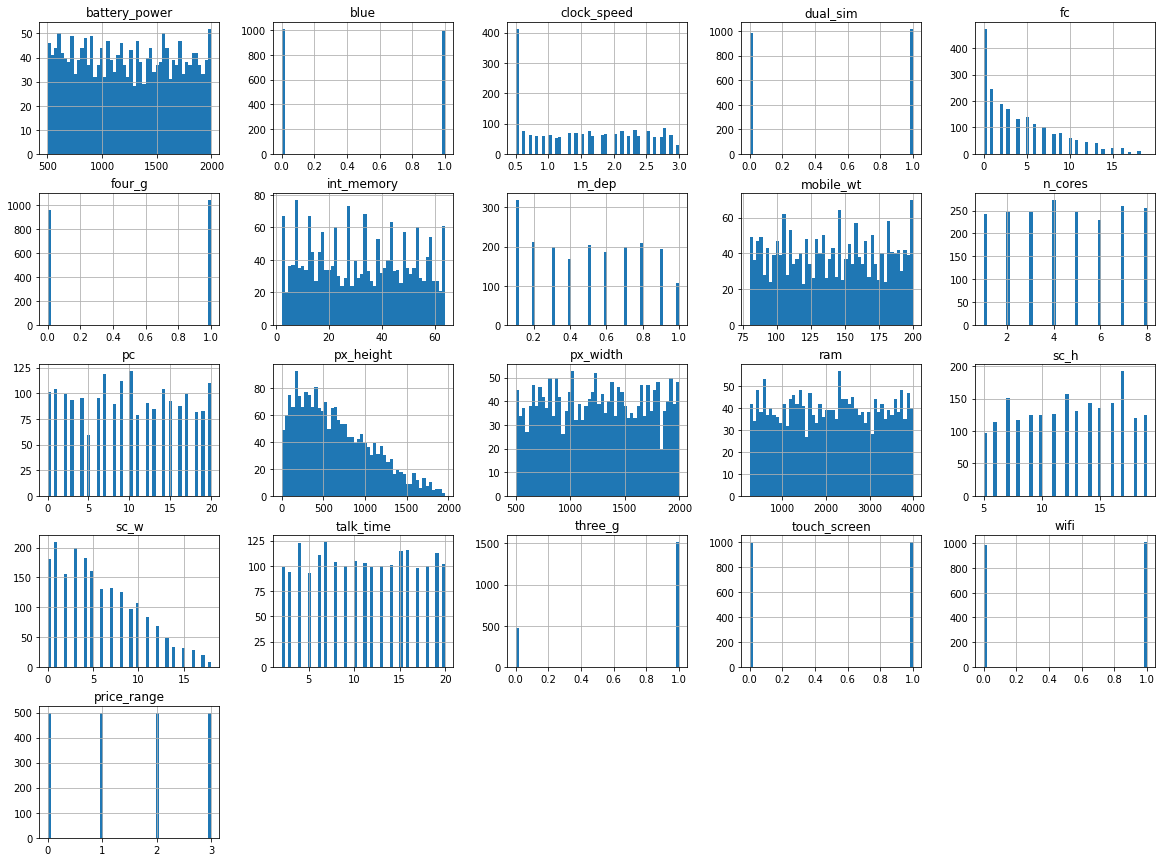

In [65]:
mobile_data.hist(bins = 50,figsize=(20,15))
plt.show()

In [66]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Корреляция признаков

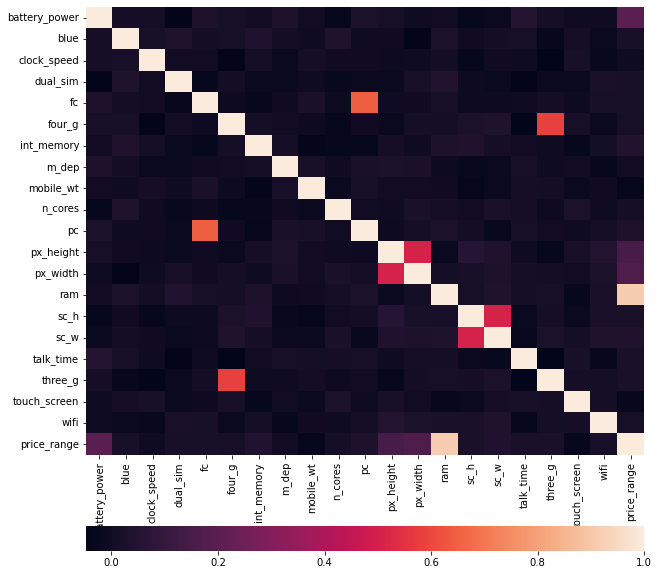

In [71]:
target = 'price_range'
corr_matrix = mobile_data.corr()
corr_matrix[target].sort_values(ascending=False)

grid_kws = {"height_ratios": (.9, .05), "hspace": .3}


f, (ax, cbar_ax) = plt.subplots(2, figsize=(10,10), gridspec_kw=grid_kws)

ax = sns.heatmap(corr_matrix, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})

plt.show()

Результирующие описание

In [70]:
mobile_data.describe(include="all")

battery_power         blue  clock_speed     dual_sim           fc  \
count    1995.000000  1995.000000  1995.000000  1995.000000  1995.000000   
mean     1238.771930     0.495238     1.522406     0.509774     4.311278   
std       439.310048     0.500103     0.815702     0.500030     4.342282   
min       501.000000     0.000000     0.500000     0.000000     0.000000   
25%       852.000000     0.000000     0.700000     0.000000     1.000000   
50%      1229.000000     0.000000     1.500000     1.000000     3.000000   
75%      1615.500000     1.000000     2.200000     1.000000     7.000000   
max      1998.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  1995.000000  1995.000000  1995.000000  1995.000000  1995.000000   
mean      0.521303    32.042105     0.502005   140.210025     4.518797   
std       0.499671    18.142980     0.288471    35.390918     2.286198   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  1995.000000  1995.000000  1995.000000  1995.000000  1995.000000   
mean      9.925313   642.029073  1249.733835  2125.666165    12.302757   
std       6.066328   440.045536   431.269283  1084.985540     4.216028   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.000000   874.000000  1208.500000     9.000000   
50%      10.000000   563.000000  1247.000000  2147.000000    12.000000   
75%      15.000000   944.500000  1630.000000  3067.000000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  1995.000000  1995.000000  1995.000000   1995.000000  1995.000000   
mean      5.762406    11.011028     0.761905      0.502757     0.506266   
std       4.354719     5.464197     0.426024      0.500118     0.500086   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  1995.000000  
mean      1.500251  
std       1.118090  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       2.500000  
max       3.000000